  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

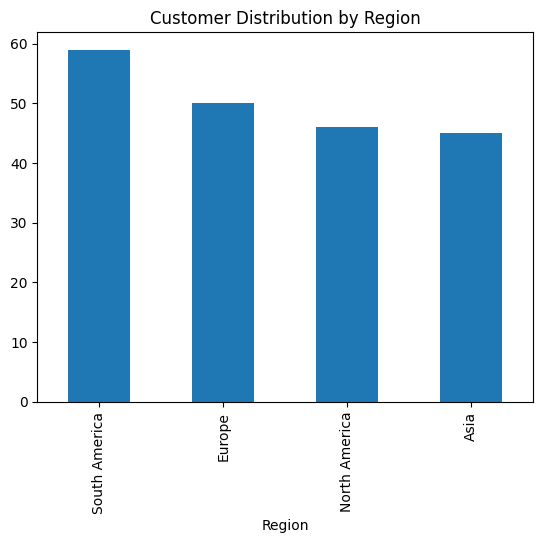

Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


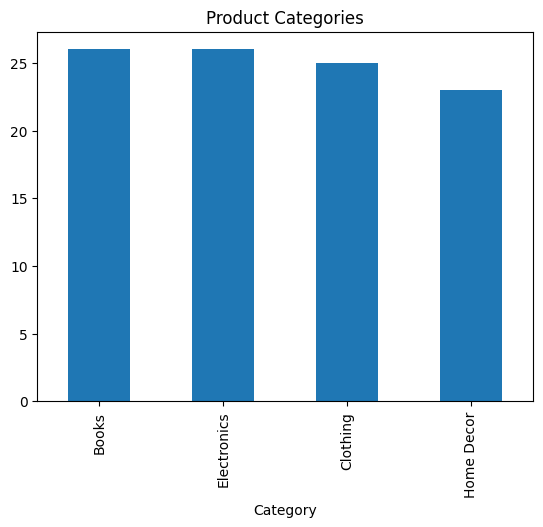

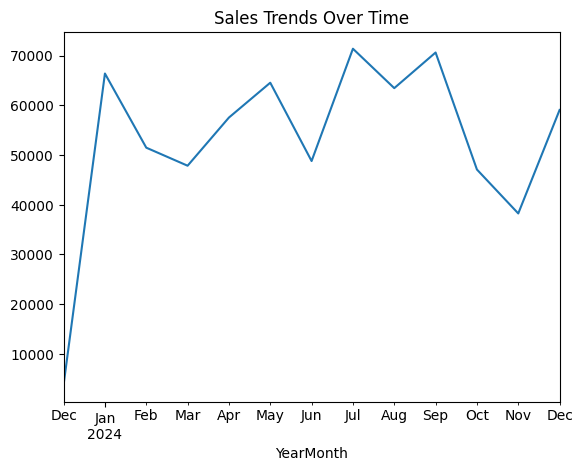

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Preview the data
print(customers.head())
print(products.head())
print(transactions.head())

# Inspect customers dataset
print(customers.info())
print(customers.describe())

# Similarly for products and transactions
print(products.info())
print(transactions.info())

# Fill missing data in customers (if any)
customers.fillna("Unknown", inplace=True)

# Drop transactions with missing Quantity or Price
transactions.dropna(subset=['Quantity', 'Price'], inplace=True)

# Convert date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Display updated data types
print(customers.info())
print(transactions.info())

# Remove rows with non-null values (i.e., rows that have missing data)
customers_missing = customers[customers.isnull().any(axis=1)]
products_missing = products[products.isnull().any(axis=1)]
transactions_missing = transactions[transactions.isnull().any(axis=1)]

# Preview rows with missing data
print("Missing data in customers:")
print(customers_missing)
print("Missing data in products:")
print(products_missing)
print("Missing data in transactions:")
print(transactions_missing)

# Analyze customer distribution by region
region_counts = customers['Region'].value_counts()
print(region_counts)

# Plot customer distribution
region_counts.plot(kind='bar', title='Customer Distribution by Region')
plt.show()

# Analyze product categories
category_counts = products['Category'].value_counts()
print(category_counts)

# Plot product categories
category_counts.plot(kind='bar', title='Product Categories')
plt.show()

# Analyze sales trends over time
transactions['YearMonth'] = transactions['TransactionDate'].dt.to_period('M')
sales_trends = transactions.groupby('YearMonth')['TotalValue'].sum()
sales_trends.plot(kind='line', title='Sales Trends Over Time')
plt.show()
